In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
import seaborn as sns

import numpy as np
import pandas as pd

import uncertainties
from uncertainties import ufloat
from uncertainties.umath import *
from IPython.display import display, Math, Latex

# Sonda Kelvina

In [60]:
df_CPD_Au = pd.read_csv("Wyniki pomiarow CPD dla Au.dat", skipfooter=31, usecols=range(10), engine='python')
df_CPD_X1 = pd.read_csv("Wyniki pomiarow CPD dla probki X1.dat", skipfooter=31, usecols=range(10), engine='python')
df_CPD_X2 = pd.read_csv("Wyniki pomiarow CPD dla probki X2.dat", skipfooter=31, usecols=range(10), engine='python')
df_CPD_X2

,Point,WF (mV),WFRA (mV),WFDel (mV),Std WF,GD (au),Std GD,Z Height (um),User,Time(Secs)
0,0,-514.9,-514.9,0.0,0.0,299.6,0.0,0.0,1.6,0.000
1,1,-517.6,-516.3,-2.7,0.0,299.8,0.0,0.0,1.4,0.561
2,2,-518.9,-516.7,-3.9,0.0,300.0,0.0,0.0,1.4,1.139
3,3,-510.3,-515.6,4.6,2.0,299.9,0.2,0.0,0.9,1.685
4,4,-514.3,-514.5,0.6,3.8,299.6,0.2,0.0,1.2,2.246
...,...,...,...,...,...,...,...,...,...,...
1496,1496,-517.2,-517.1,-2.3,2.9,294.5,1.5,0.0,0.5,863.803
1497,1497,-517.0,-517.1,-2.1,2.9,294.4,1.5,0.0,1.3,864.411
1498,1498,-510.5,-514.9,4.5,2.9,294.6,1.5,0.0,1.4,865.004
1499,1499,-515.1,-514.2,-0.2,2.9,294.3,1.5,0.0,1.3,865.581


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

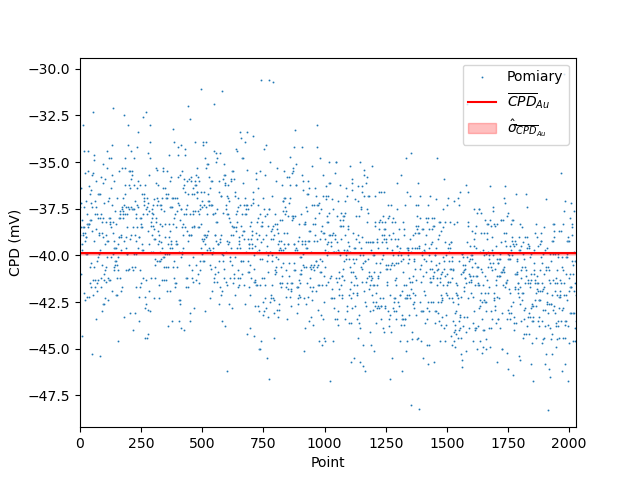

In [3]:
CPD_Au = ufloat(df_CPD_Au['CPD (mV)'].mean(), df_CPD_Au['CPD (mV)'].sem()) # mV
CPD_X1 = ufloat(df_CPD_X1['WF (mV)'].mean(), df_CPD_X1['WF (mV)'].sem()) # mV
CPD_X2 = ufloat(df_CPD_X2['WF (mV)'].mean(), df_CPD_X2['WF (mV)'].sem()) # mV

graph = sns.scatterplot(x="Point", y="CPD (mV)", data=df_CPD_Au, s=2, label="Pomiary")
graph.axhline(CPD_Au.n, color='r', linestyle='-', label='$\overline{CPD}_{Au}}$')
graph.fill_between(df_CPD_Au["Point"], CPD_Au.n-CPD_Au.s, CPD_Au.n+CPD_Au.s, color='r', alpha=0.25, label='$\hat{\sigma}_{\overline{CPD}_{Au}}$')
graph.set_xlim(df_CPD_Au["Point"].min(), df_CPD_Au["Point"].max())
graph.legend()

display(Latex(f"$\overline{{CPD}}_{{Au}} =$ {CPD_Au:.2uP} mV"))
display(Latex(f"$\overline{{CPD}}_{{X1}} =$ {CPD_X1:.2uP} mV"))
display(Latex(f"$\overline{{CPD}}_{{X2}} =$ {CPD_X2:.2uP} mV"))

In [146]:
WF_Au = ufloat(4800, 3) # meV
# e = 1.602176634e-19 # C
e = 1 # e
WF_tip = WF_Au + 1*e * CPD_Au
WF_X1 = WF_tip - 1*e * CPD_X1
WF_X2 = WF_tip - 1*e * CPD_X2


display(Latex(f"$WF_{{tip}} =$ {WF_tip:.2uP} meV"))
display(Latex(f"$WF_{{X1}} =$ {WF_X1:.2uP} meV"))
display(Latex(f"$WF_{{X2}} =$ {WF_X2:.2uP} meV"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Zaokrąglanie liczb i niepewności zgodnie z wytycznymi Particle Data Group https://pdg.lbl.gov/2010/reviews/rpp2010-rev-rpp-intro.pdf

## Topografie

4798.304668786527


/tmp/ipykernel_2183/1280536295.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


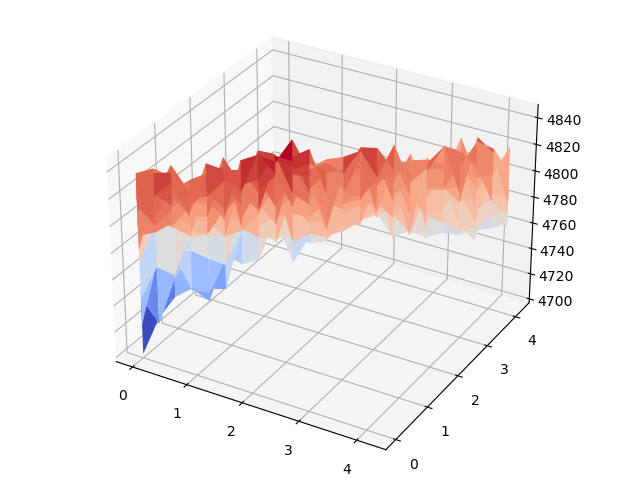

In [143]:
X = np.linspace(0, 4.19, 23)
Y = np.linspace(0, 4.19, 23)

fname = "Topografia CPD dla Au.dat"
topo_Au = dict()
topo_Au["work"] = np.genfromtxt(fname, skip_header=1, max_rows=23, delimiter=',', usecols=range(23))
topo_Au["tracking"] = np.genfromtxt(fname, skip_header=25, max_rows=23, delimiter=',', usecols=range(23))
topo_Au["grad"] = np.genfromtxt(fname, skip_header=49, max_rows=23, delimiter=',', usecols=range(23))
topo_Au["time"] = np.genfromtxt(fname, skip_header=73, max_rows=23, delimiter=',', usecols=range(23))

topo_Au["WF"] = WF_tip.n + 1*e * topo_Au["work"]
print(topo_Au["WF"].mean()) 

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, topo_Au["WF"], cmap=cm.coolwarm)
# surf = ax.plot_surface(X, Y, topo_Au["WF"], cmap=cm.coolwarm)
# fig.colorbar(surf, shrink=0.5, aspect=5)
# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.show()

# axes3d.Axes3D(X, Y, topo_Au["WF"])



3629.4600563101567


/tmp/ipykernel_2183/96360438.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


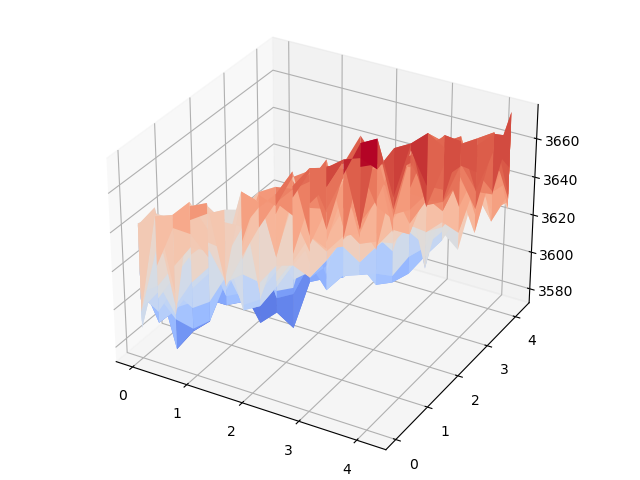

In [147]:
X = np.linspace(0, 4.19, 23)
Y = np.linspace(0, 4.19, 23)

topo_Al = dict()
fname = "Topografia CPD dla Al.dat"
topo_Al["work"] = np.genfromtxt(fname, skip_header=1, max_rows=23, delimiter=',', usecols=range(23))
# topo_Al["tracking"] = np.genfromtxt(fname, skip_header=25, max_rows=23, delimiter=',', usecols=range(23))
# topo_Al["grad"] = np.genfromtxt(fname, skip_header=49, max_rows=23, delimiter=',', usecols=range(23))
# topo_Al["time"] = np.genfromtxt(fname, skip_header=73, max_rows=23, delimiter=',', usecols=range(23))

topo_Al["WF"] = WF_tip.n + 1*e * topo_Al["work"]
print(topo_Al["WF"].mean()) 

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, topo_Al["WF"], cmap=cm.coolwarm)
# surf = ax.plot_surface(X, Y, topo_Au["WF"], cmap=cm.coolwarm)
# fig.colorbar(surf, shrink=0.5, aspect=5)
# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.show()

# axes3d.Axes3D(X, Y, topo_Au["WF"])



4218.622053474618


/tmp/ipykernel_2183/3668958641.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


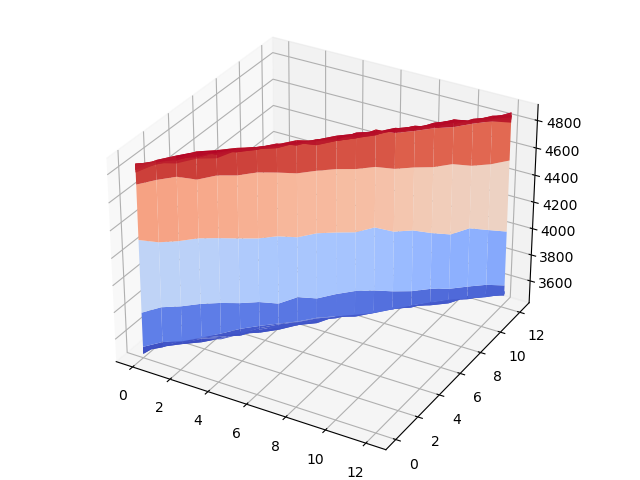

In [145]:
X = np.linspace(0, 12.1, 20) # mm
Y = np.linspace(0, 12.1, 20)

topo_Au_Al = dict()
fname = "Topografia CPD dla probki Au-Al.dat"
topo_Au_Al["work"] = np.genfromtxt(fname, skip_header=1, max_rows=20, delimiter=',', usecols=range(20))


topo_Au_Al["WF"] = WF_tip.n + 1*e * topo_Au_Al["work"]
print(topo_Au_Al["WF"].mean()) 

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, topo_Au_Al["WF"], cmap=cm.coolwarm)
# surf = ax.plot_surface(X, Y, topo_Au["WF"], cmap=cm.coolwarm)
# fig.colorbar(surf, shrink=0.5, aspect=5)
# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.show()

# axes3d.Axes3D(X, Y, topo_Au["WF"])



## Napięcie rozwarcia $V_{OC}$ ogniwa Si

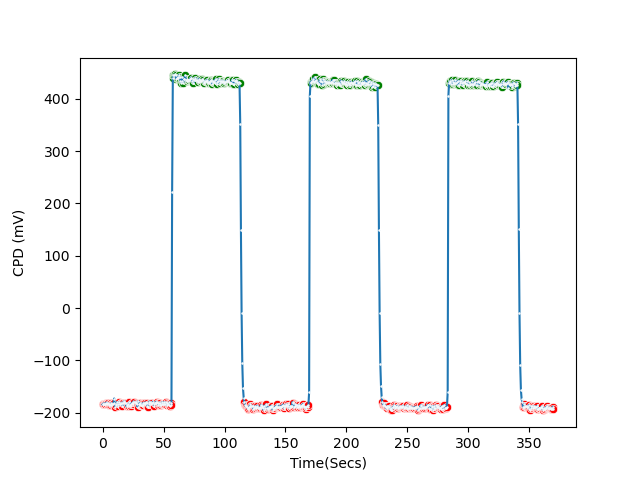

<IPython.core.display.Latex object>

In [116]:
df_CPD_Si = pd.read_csv("CPD dla ogniwa mono Si – pomiar ze swiatlem i bez.dat", skipfooter=31, usecols=range(10), engine='python')

fig = plt.figure()
sns.lineplot(x="Time(Secs)", y="WF (mV)", data=df_CPD_Si, marker='o', markersize=1)
sns.scatterplot(x="Time(Secs)", y="WF (mV)", data=df_CPD_Si[df_CPD_Si["WF (mV)"] < -180], marker='o', sizes=10, color='red')
sns.scatterplot(x="Time(Secs)", y="WF (mV)", data=df_CPD_Si[df_CPD_Si["WF (mV)"] > 420], marker='o', sizes=10, color='green')
plt.ylabel("CPD (mV)")
plt.show()


V_CPD_d = df_CPD_Si[df_CPD_Si["WF (mV)"] < -180]["WF (mV)"]
V_CPD_il = df_CPD_Si[df_CPD_Si["WF (mV)"] > 420]["WF (mV)"]

V_d = ufloat(V_CPD_d.mean(), V_CPD_d.sem())
V_il = ufloat(V_CPD_il.mean(), V_CPD_il.sem())
V_OC = V_il - V_d
display(Latex(f"$V_{{OC}} =$ {V_OC:.2uP} meV"))

## SPV (surface photovoltage) ogniwa Si

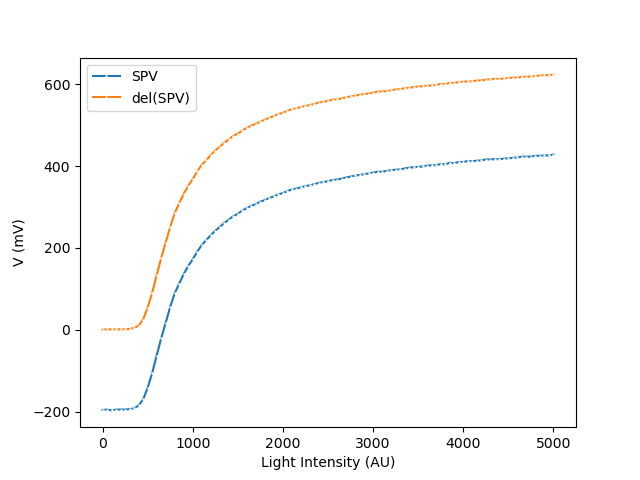

In [137]:
df_SPV = pd.read_csv("SPV dla ogniwa mono-Si.dat.DAT", names=["Point", "INT (AU)", "SPV (mV)", "del(SPV) mV"], engine='python', delimiter=",", skiprows=1)
df_SPV
fig = plt.figure()
sns.lineplot(x="INT (AU)", y="SPV (mV)", data=df_SPV, marker='o', markersize=1, label="SPV")
sns.lineplot(x="INT (AU)", y="del(SPV) mV", data=df_SPV, marker='o', markersize=1, label="del(SPV)")
plt.xlabel("Light Intensity (AU)")
plt.ylabel("V (mV)")


plt.show()
